- Resampling, Cleaning, Missing Values

- Univariate forecasting

- ARIMA model = AR-Autoregressive, I- Differencing MA- Moving Average
    - Small AIC
    - Select P for AR, PACF plot
    - Select Q for MA, ACF plot
    - Select I
    - Plot one attirbute, see patterns: Cyclic, Seasonal, Trend
    - Seasonal decompose: Check Trend, Seasonality, Residual
    - Make Data Stationary: Log, Sqrt Transformation, Differencing.
    - Stationarity test: Adf test, Rolling Statistics
    - PACF plot, ACF plot correlations will disapper if data is stationary
    - Train model on selected P, Q, R
    - Perform Grid-Search and try to minimize AIC
    - Evaluate on Test-set(forecast), Calculate MSE
    - Any transformations that are applied must be reverted.
 
- Multivariate forecasting
    - Create separate ARIMA model for each observed feature(series)
    - VAR model: Cross Series Lagged
- Convert it as Supervised Learning Problem
- Neural Networks
    - RNN
    - LSTM
    - Last layer will give output

**Blogs**

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/

https://machinelearningmastery.com/time-series-data-stationary-python/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387 (supports jason brownlee)

**Books**

Jason Brownlee LSTM

file:///C:/Users/Tinsae/Downloads/kupdf.net_long-short-term-memory-networks-with-python.pdf

Dr. N.D Lewis Deep Learning for Time-series

**Videos**

Jeffrey Yau - Time Series Forecasting using Statistical and Machine Learning Models

https://www.youtube.com/watch?v=_vQ0W_qXMxk

Udacity Course - Time Series Forecasting

https://classroom.udacity.com/courses/ud980

Edureka

https://www.youtube.com/watch?v=e8Yw4alG16Q&t=1475s

Time Series Forecasting Theory - Datamites Data Science Projects

https://www.youtube.com/watch?v=YzMV--KhI2I

Cryptocurrency-predicting RNN 

https://www.youtube.com/watch?v=ne-dpRdNReI&t=569s

Time Series Forecasting Using Recurrent Neural Network and Vector Autoregressive Model: When and How

https://www.youtube.com/watch?v=i40Road82No

Data Reference

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Tools Reference

https://towardsdatascience.com/why-every-data-scientist-should-use-dask-81b2b850e15b

conda install -c conda-forge dask 

**Yellow Taxi**: Yellow Medallion Taxicabs: These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.

**For Hire Vehicles (FHVs)**: FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged.

**Green Taxi**: Street Hail Livery (SHL): The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides.

The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [2]:
y2016 = dd.read_csv('../../../../../taxi_data/2016_Yellow_Taxi_Trip_Data.csv')
y2016.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,1,05/16/2016 02:36:46 PM,05/16/2016 02:55:01 PM,1,5.20,-73.964600,40.806728,1,N,-73.929451,...,1,19.5,0.0,0.5,4.05,0.0,0.3,24.35,NaN,NaN
1,2,05/04/2016 04:11:11 PM,05/04/2016 04:28:14 PM,5,2.63,-73.987007,40.755798,1,N,-73.960518,...,1,12.5,1.0,0.5,2.86,0.0,0.3,17.16,NaN,NaN
2,2,05/17/2016 11:31:41 AM,05/17/2016 11:46:53 AM,2,4.55,-73.986816,40.725098,1,N,-74.015366,...,1,16.0,0.0,0.5,3.36,0.0,0.3,20.16,NaN,NaN
3,2,05/12/2016 08:59:59 AM,05/12/2016 09:13:55 AM,1,1.18,-73.966232,40.765701,1,N,-73.954239,...,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,NaN,NaN
4,1,05/20/2016 10:09:08 PM,05/20/2016 10:20:07 PM,1,1.20,-73.999588,40.733456,1,N,-73.980164,...,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80,NaN,NaN


In [2]:
y2017 = dd.read_csv('../../../../../taxi_data/2017_Yellow_Taxi_Trip_Data.csv')
y2017.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,10/31/2017 05:09:38 PM,10/31/2017 05:16:23 PM,1,0.93,1,N,186,48,1,6.5,1.0,0.5,1.66,0.0,0.3,9.96
1,2,10/31/2017 05:20:13 PM,10/31/2017 05:23:32 PM,1,0.65,1,N,142,143,1,4.5,1.0,0.5,1.89,0.0,0.3,8.19
2,2,10/31/2017 05:47:13 PM,10/31/2017 05:57:56 PM,1,1.48,1,N,238,142,2,8.5,1.0,0.5,0.00,0.0,0.3,10.30
3,1,10/31/2017 05:06:32 PM,10/31/2017 05:12:56 PM,1,0.50,1,N,239,143,1,5.5,1.0,0.5,2.70,0.0,0.3,10.00
4,1,10/31/2017 05:35:55 PM,10/31/2017 05:49:08 PM,2,1.80,1,N,48,68,2,10.0,1.0,0.5,0.00,0.0,0.3,11.80


In [ ]:
len(y2017.index)

In [4]:
y2018 = dd.read_csv('../../../../../taxi_data/2018_Yellow_Taxi_Trip_Data.csv')
y2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,11/04/2084 12:32:24 PM,11/04/2084 12:47:41 PM,1,1.34,1,N,238,236,2,10.0,0.0,0.5,0.0,0.0,0.3,10.8
1,2,11/04/2084 12:32:24 PM,11/04/2084 12:47:41 PM,1,1.34,1,N,238,236,2,10.0,0.0,0.5,0.0,0.0,0.3,10.8
2,2,11/04/2084 12:25:53 PM,11/04/2084 12:29:00 PM,1,0.32,1,N,238,238,2,4.0,0.0,0.5,0.0,0.0,0.3,4.8
3,2,11/04/2084 12:25:53 PM,11/04/2084 12:29:00 PM,1,0.32,1,N,238,238,2,4.0,0.0,0.5,0.0,0.0,0.3,4.8
4,2,11/04/2084 12:08:33 PM,11/04/2084 12:22:24 PM,1,1.85,1,N,236,238,2,10.0,0.0,0.5,0.0,0.0,0.3,10.8


In [5]:
y2016.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'PULocationID',
       'DOLocationID'],
      dtype='object')

In [6]:
y2017.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [7]:
y2018.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [ ]:
y2016.loc[:3].isnull().sum().compute()

### Data Dictionary

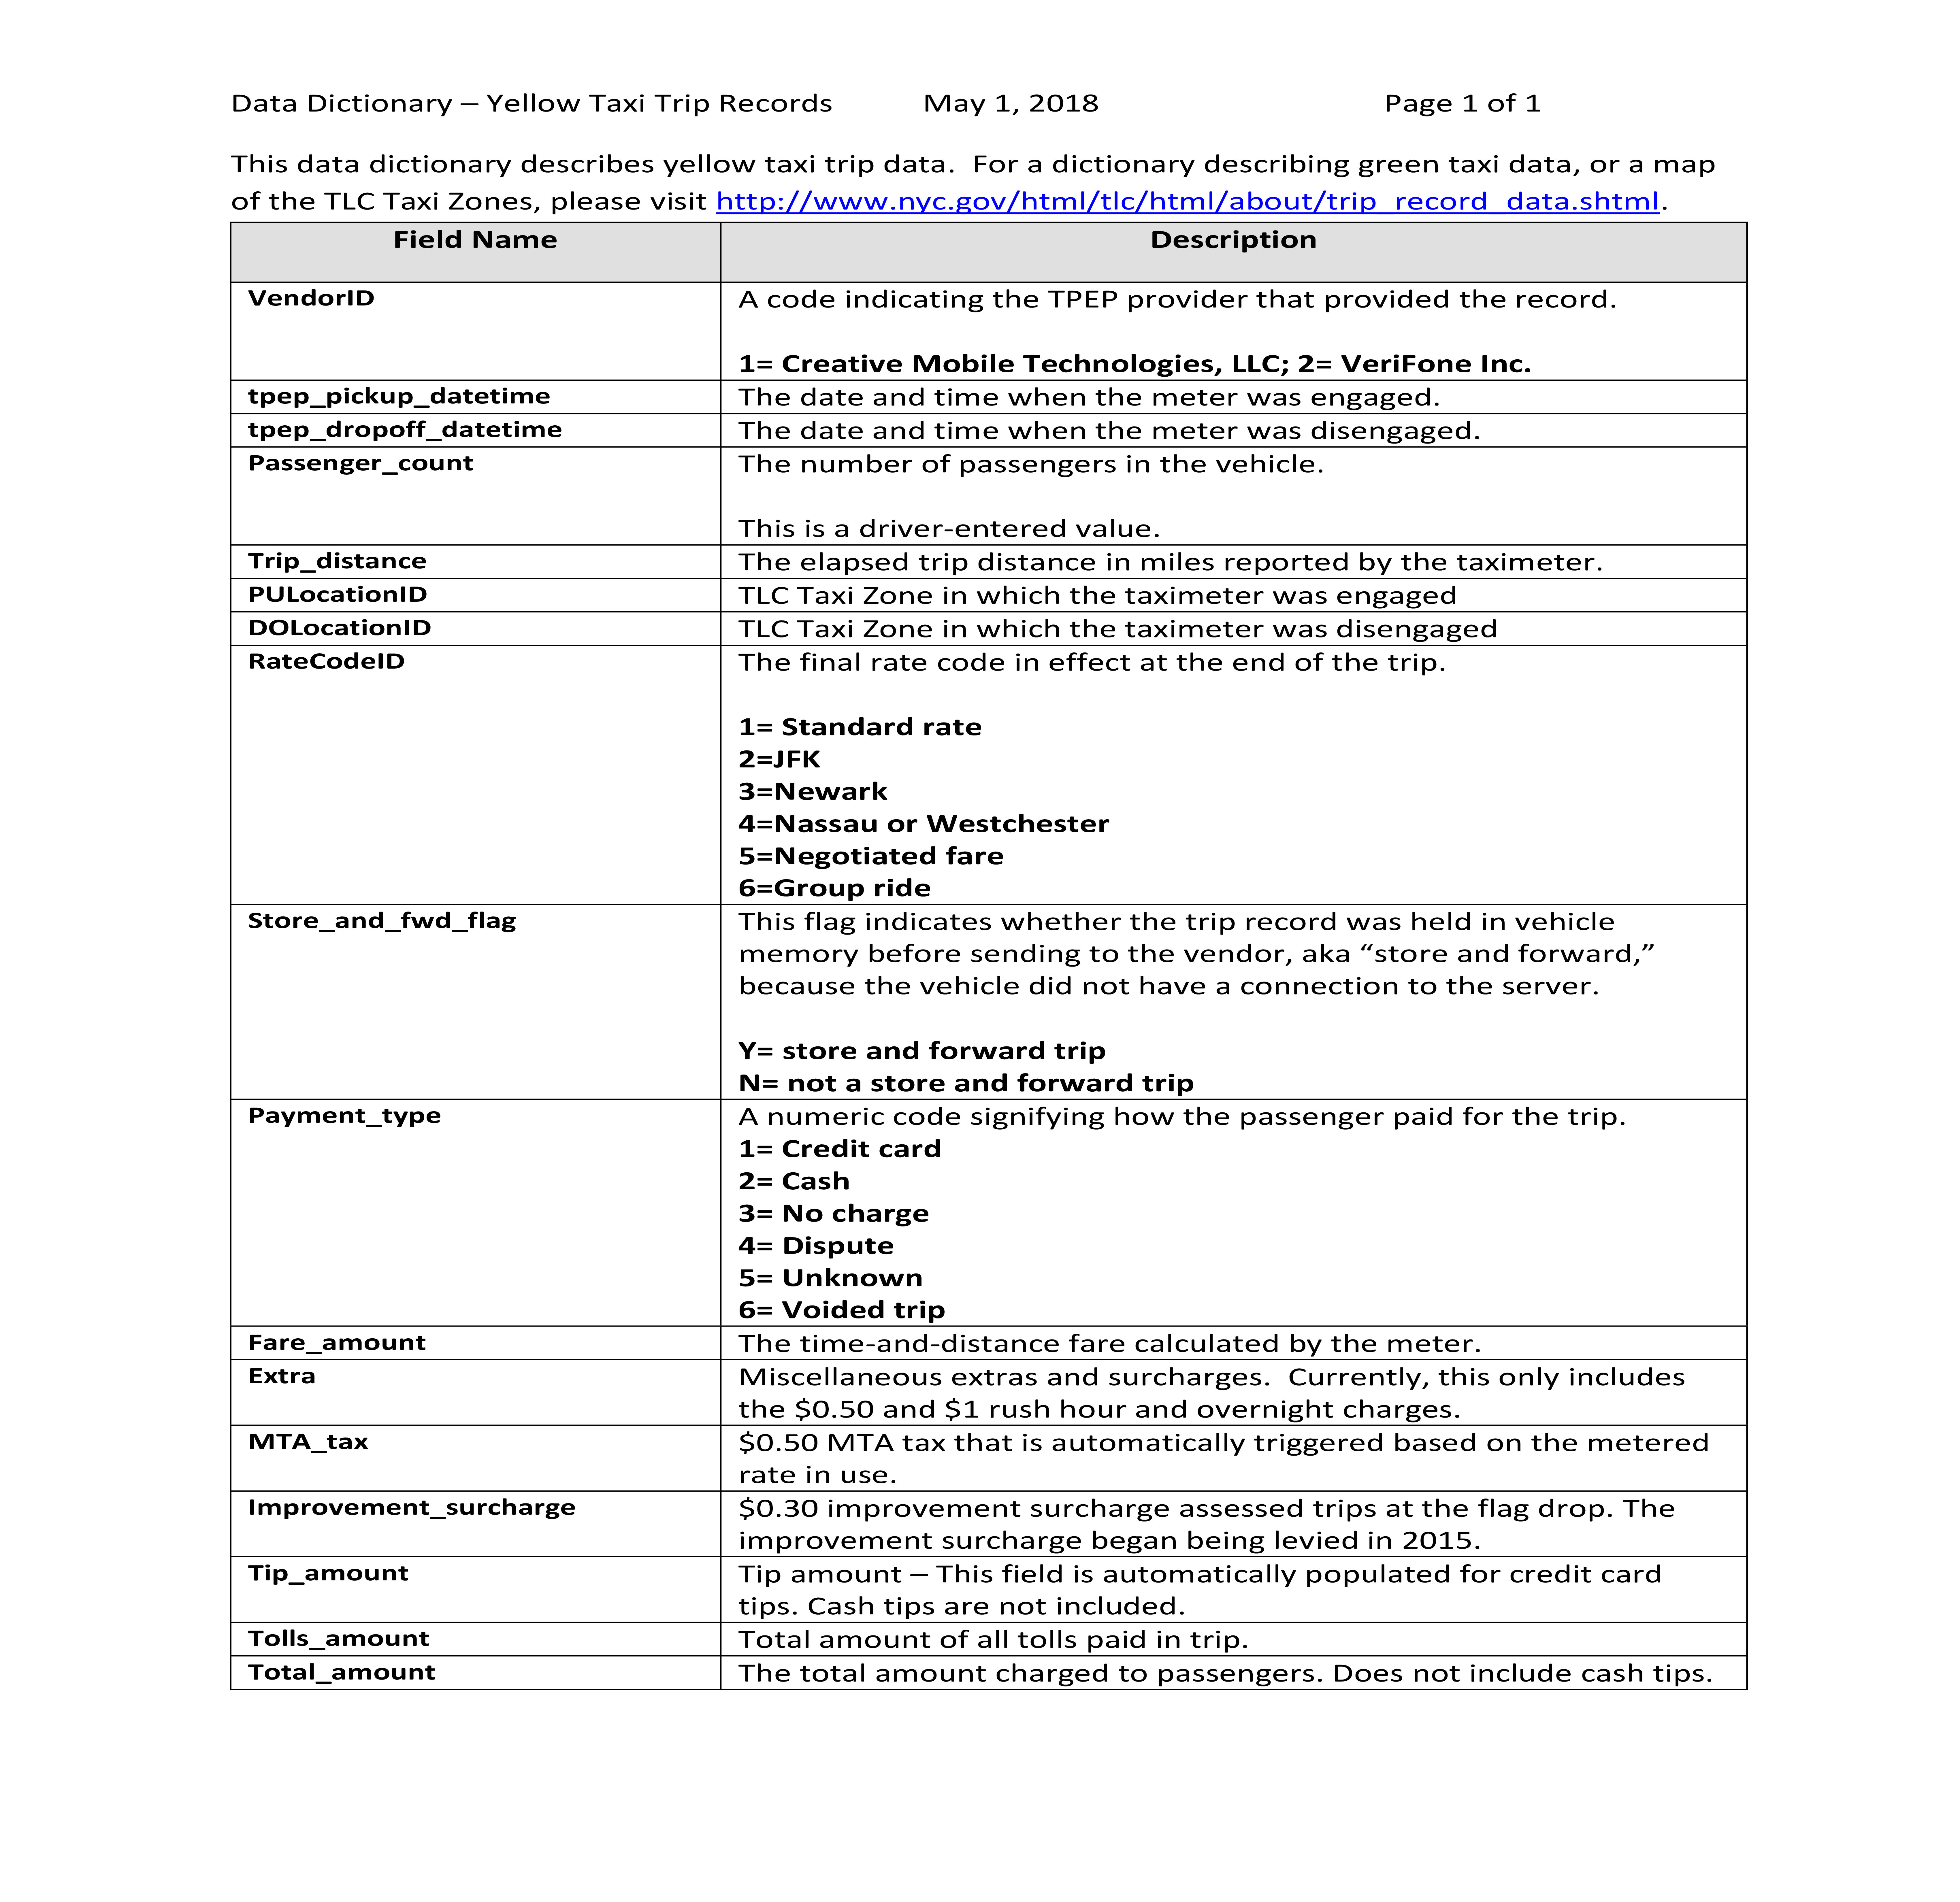

In [9]:
# on windows install ghostscript,ImageMagick
# pip install Wand
from wand.image import Image as WImage
img = WImage(filename='F:/taxi_data/data_dictionary_trip_records_yellow_new.pdf', height=100, width=100, resolution=[800,600])
img

In [ ]:
print("2016: ", len(y2016.columns))
print("2017: ", len(y2017.columns))
print("2018: ", len(y2018.columns))

In [ ]:
# no difference between 2017 and 2018
print(set(y2017.columns).difference(set(y2018.columns)))

In [ ]:
# 2016 - 2017
print(set(y2016.columns).difference(set(y2017.columns)))

In [ ]:
# 2018 - 2017
print(set(y2016.columns).difference(set(y2018.columns)))

In [ ]:
print("Number of nan values = {}".format(y2016.isnull().sum().compute()))

In [ ]:
Purely label-location based indexer for selection by label.


In [19]:
# i need to create a code that finds the price of 3 items. 
# the first price isnt discounted, 
# the second is discounted by the lesser of the items cost 
# or the minimum non-discounted price of an earlier item on the list.

prices = [2,5,1]
length = len(prices)
for i in range(length):
    # if it is not beginning price
    if i != 0:
        # find smallest from current and previous price
        mini = min(prices[i], prices[i - 1])
        # subtract minimum from current price
        prices[i] = prices[i] - mini
print(prices)
print(sum(prices))

[2, 3, 0]
5


In [17]:
prices

[10, 0, 1, 3, 6, 0]

In [24]:
word = "tinsae"
word[::-1][0] + " " + word[::-1][1]

'e a'

In [25]:
n=2
print(" ".join(word[:-n-1:-1]))

e a


In [27]:
reverse_str = word[::-1]
" ".join(reverse_str[:2])

'e a'

In [41]:
# i need to create a code that finds the price of 3 items. 
# the first price isnt discounted, 
# the second is discounted by the lesser of the items cost 
# or the minimum non-discounted price of an earlier item on the list.

def calculateAmount(prices):
    # obtain number of items
    num_items = prices[0]
    # stores num_items and discounted prices
    final_prices = [num_items]
    # append first price
    final_prices.append(prices[1])
    for i in range(1, num_items + 1):
        # if it is not first item
        if i != 1:
            # find smallest of all previous elements
            mini = min(prices[1:i+1])
            # subtract minimum from current price
            # append it to final_prices
            final_prices.append(prices[i] - mini)
    # return total price, ignore fractions
    print(final_prices)
    return int(sum(final_prices[1:]))
    
# call function
calculateAmount([3,1,2,3])


# 4 4 9 2 3    4 = 4, 9 > 4 so 9 - 4 = 5
#   4 5 2 3    2 < min(4, 9) so 2 - 4 = 0 
#   4 5 0 3    3 > min(4,9,2) so 3 - 2 = 1 
#   4 5 0 3
#   4501
 

[3, 1, 1, 2]


4

In [43]:
calculateAmount([3,1,1,2])

[3, 1, 0, 1]


2

In [59]:
import numpy as np
X = np.array([[3, 4, 5, 1, 1, 2], [4, 4, 1, 2, 3, 5], [4,5,6,1,1,2], [4,2,1,5,1,3]])
y = np.array([1,0,0,1])


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2
Kbest = SelectKBest()
K_params = {'k':[1,2,3,4,5,6,7,8], 'score_func':[chi2, f_classif]}
Kgrid = GridSearchCV(Kbest, K_params, cv=3, verbose=3, scoring='accuracy')



Kgrid.fit(X, y)
print('Best parameters for decision tree:', Kgrid.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] k=1, score_func=<function chi2 at 0x00000209C7130950> ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AttributeError: 'SelectKBest' object has no attribute 'predict'